In [1]:
%run ct_include.ipy

In [2]:
import seaborn as sns

sns.set()

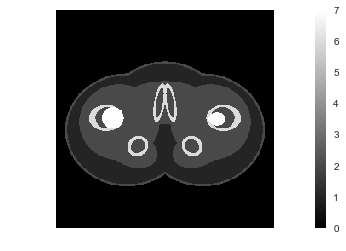

In [19]:
phantom = ct_phantom(material_data.names, 256, 4, 'Titanium')
draw(phantom)

In [6]:
photon_source = source_data.photons[0] 
scale = 0.1
sinogram = ct_scan(photon_source, material_data, phantom, scale, 256, interpolation_order=1)

Scanning angle: 256   


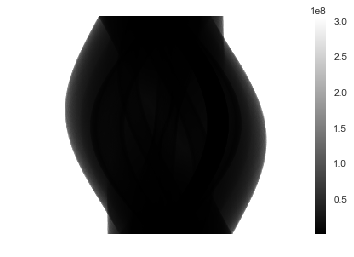

In [7]:
draw(sinogram)

In [8]:
total_attenuation = ct_calibrate(photon_source, material_data, sinogram, scale)

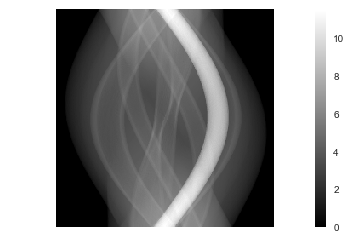

In [9]:
draw(total_attenuation)

Scanning angle: 256   
Ramp filtering...
Reconstructing angle: 256   


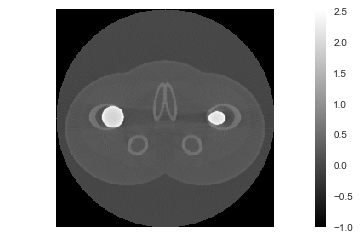

In [20]:
reconstruction = scan_and_reconstruct(photon_source, material_data, phantom, 0.1, 256)
draw(reconstruction)

In [130]:
y = ramp_filter(np.array([1] + [0] * 255).reshape([1, 256]), scale=0.1)

Ramp filtering
(1, 1024) (1, 256)


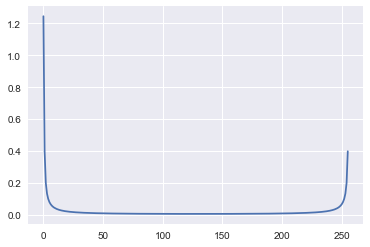

In [125]:
plt.plot(np.arange(256), np.abs(y).ravel())

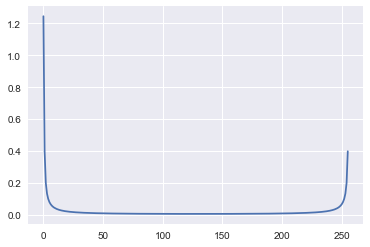

In [126]:
plot(np.abs(y.ravel()))

In [136]:
from ramp_filter import get_ramlak

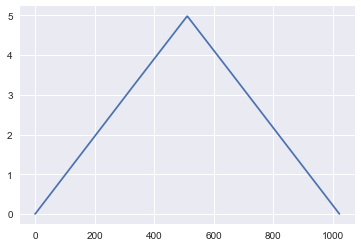

In [145]:
plot(get_ramlak(0.1, 1024, 0.01))

In [146]:
get_ramlak(0.1, 1024, 0.001)

array([0.00488281, 0.00976562, 0.01953125, ..., 0.01953125, 0.00976562,
       0.00488281], dtype=float32)